In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import graphviz 
%matplotlib notebook

In [2]:
%matplotlib notebook

### Variables

##### Columns
PassengerId

Pclass

Name: the name of the passenger

Sex

Age

SibSp: # of siblings / spouses aboard the Titanic

Parch: # of parents / children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Port of Embarkation


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



In [3]:
# Import data
df_train = pd.read_csv('train.csv')

# Fill in NaNs
df_train.fillna({'Age': df_train['Age'].mean(), 'Cabin':'NA'}, inplace=True)

# Transform Male, Female to 1,0
le = preprocessing.LabelEncoder()
le.fit(df_train['Sex'].values)
sex_dict = {label:le.transform([label])[0] for label in le.classes_}
print(sex_dict)
df_train['Sex'] = le.transform(df_train['Sex'])

{'male': 1, 'female': 0}


In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NA,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NA,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NA,S
5,6,0,3,"Moran, Mr. James",1,29.699118,0,0,330877,8.4583,NA,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NA,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,NA,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,NA,C


In [61]:
# Create feature and target arrays
y = df_train['Survived']
X = df_train.drop(columns=['Survived','PassengerId','Name','Ticket','Cabin','Embarked'])

cv_values = [5,10,20]#range(5,21,4) # Values of k in k-fold cross-validation

num_cv_repeats = 3 # repeat cross-validation multiple times for each k

cv_scores_mean_list = [] # Store mean of cv scores for each value of fold 
cv_scores_std_list = [] # Store standard deviation of cv scores for each value of fold 
optimal_max_depth_list = [] # Store optimal max_depth for each fold
for cv in cv_values:    
    cv_scores_mean = []
    cv_scores_std = []
    for max_depth in max_depths_use:
        tree = DecisionTreeClassifier(max_depth=max_depth)
        scores = list(cross_val_score(tree, X, y, cv=cv))
        for _ in range(num_cv_repeats-1):
            scores = scores + list(cross_val_score(tree, X, y, cv=cv))
        cv_scores_mean.append(np.mean(np.array(scores)))
        cv_scores_std.append(np.std(np.array(scores)))
    cv_scores_mean_list.append(cv_scores_mean)
    cv_scores_std_list.append(cv_scores_std)
    optimal_max_depth_list.append(max_depths_use[np.argmax(cv_scores_mean)])
cv_scores_mean_array = np.array(cv_scores_mean_list)
cv_scores_std_array = np.array(cv_scores_std_list)

<IPython.core.display.Javascript object>


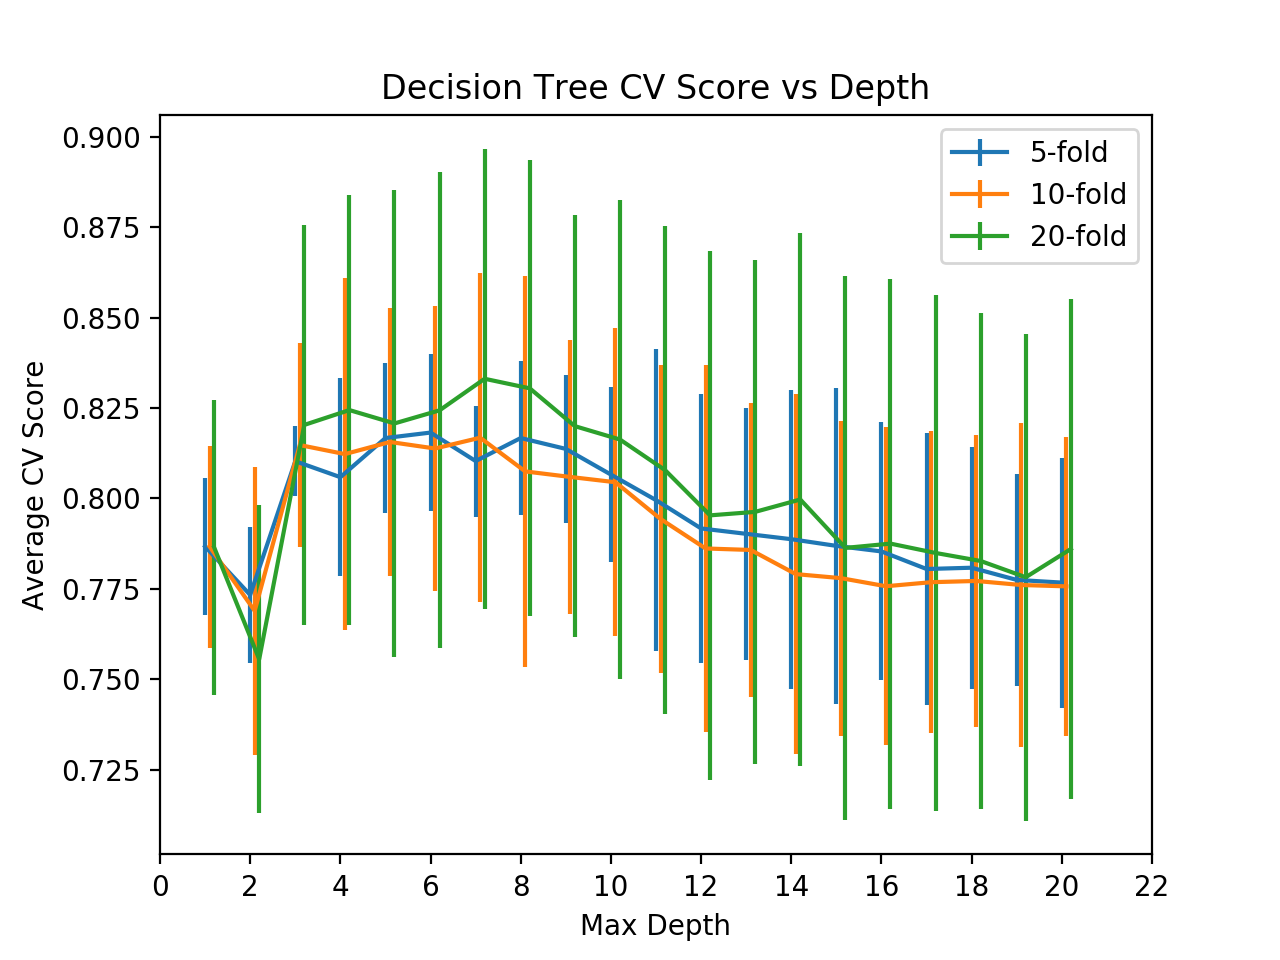

5-fold CV optimal max_depth: 6
10-fold CV optimal max_depth: 7
20-fold CV optimal max_depth: 7


In [62]:
# Plot Decision Tree Score vs Max Depth
plt.figure()
for i,cv in enumerate(cv_values):
    print('%i-fold CV optimal max_depth: %i'%(cv, optimal_max_depth_list[i]))
    #plt.plot(np.array(max_depths_use) + i/10., cv_scores_mean_array[i], label='%i-fold'%cv)
    plt.errorbar(np.array(max_depths_use) + i/10., cv_scores_mean_array[i], yerr=cv_scores_std_array[i], \
                 label='%i-fold'%cv)
plt.title('Decision Tree CV Score vs Depth')
plt.ylabel('Average CV Score')
plt.xlabel('Max Depth')
plt.xticks(range(0,23,2))
plt.xlim([0, 22])
plt.legend()
plt.show()

In [67]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=6, stratify=y)

#  Fit decision tree to X_test
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
y_train_predict = tree.predict(X_train)

In [69]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.821629213483
0.826815642458


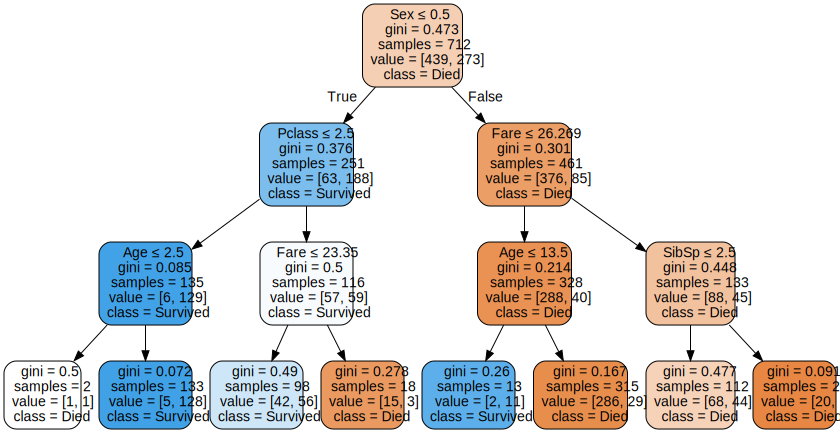

In [70]:
# Visualize Decision Tree
dot_data = sklearn.tree.export_graphviz(tree, out_file=None, feature_names=X_train.columns, 
                                class_names=['Died', 'Survived'], filled=True, rounded=True, 
                                special_characters=True)
graph = graphviz.Source(dot_data)  
graph 

In [11]:
y_train.mean()

0.38342696629213485